# Lecture 8 - Machine Learning (2) - Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

## Clustering

* Clustering is a Machine Learning technique that involves the grouping of data points.
    * https://en.wikipedia.org/wiki/Cluster_analysis
    * https://developers.google.com/machine-learning/clustering/clustering-algorithms
* K-means clustering is one of the simplest and popular unsupervised machine learning algorithms that will attempt to group similar clusters together in data (https://en.wikipedia.org/wiki/K-means_clustering).
* You can also check out further materials to learn.
    * http://www.mit.edu/~9.54/fall14/slides/Class13.pdf
    * https://www.coursera.org/learn/data-science-k-means-clustering-python#syllabus

* Let's apply the k-means algorithm to the sample data.

In [3]:
data = pd.read_csv('./samples.csv')

In [5]:
data

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


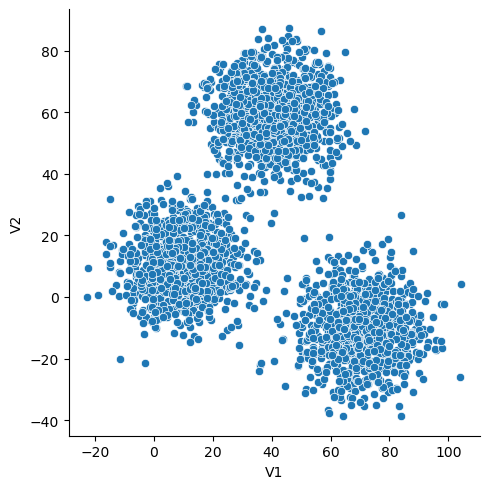

In [7]:
sns.relplot(x='V1', y='V2', data=data, kind='scatter')
plt.show()

* Of course, the scikit-learn package provide model for k-means algorithm.

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_fit = kmeans.fit(data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
labels = kmeans_fit.predict(data)

In [17]:
data['label'] = labels
data

,V1,V2,label
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2
...,...,...,...
2995,85.652800,-6.461061,1
2996,82.770880,-2.373299,1
2997,64.465320,-10.501360,1
2998,90.722820,-12.255840,1


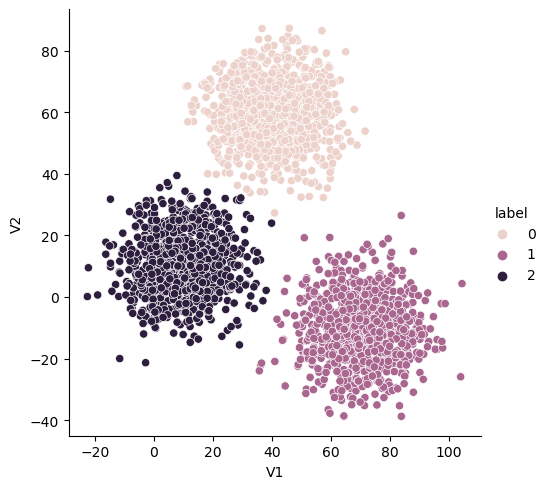

In [19]:
sns.relplot(x='V1', y='V2', data=data, kind='scatter', hue='label')
plt.show()

* How about applying a different K?

In [21]:
data = pd.read_csv('./samples.csv')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


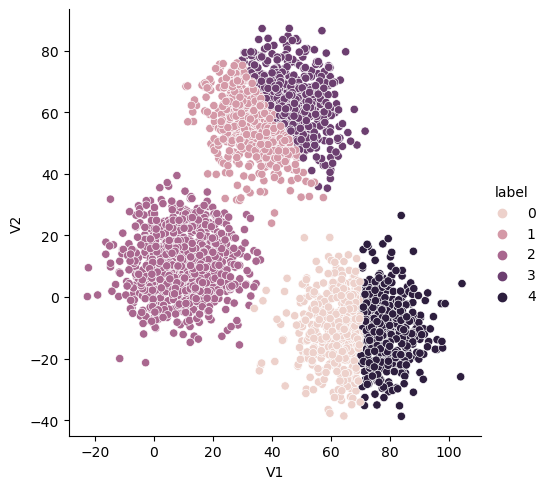

In [23]:
kmeans = KMeans(n_clusters=5)
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

data['label'] = labels


sns.relplot(x='V1', y='V2', data=data, kind='scatter', hue='label')
plt.show()

* How can we decide the best $K$ value? 

In [25]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

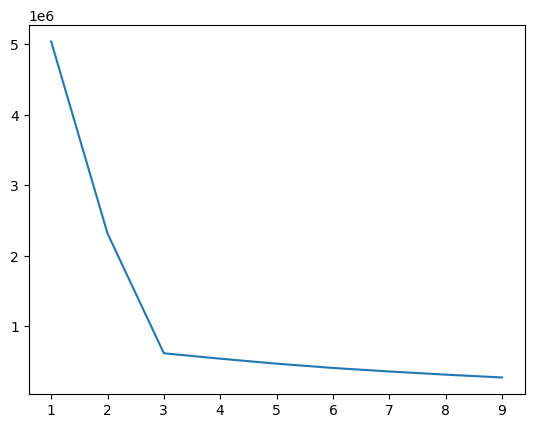

In [27]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* Now, let's take a look at the customer segmentation data,
    * https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
customers = pd.read_csv('./Mall_Customers.csv')


* Let's apply clustering algorithm with two features, annual income and spending score.

In [ ]:
sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score',  data = customers)
plt.show()

In [ ]:
data = customers[['Annual_Income', 'Spending_Score']]

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans_fit = kmeans.fit(data)
labels = kmeans_fit.predict(data)

In [ ]:
customers['cluster'] = labels

In [ ]:
sns.relplot(x='Annual_Income', y='Spending_Score', hue='cluster',data=customers)
plt.show()

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

In [ ]:
x = list(sse.keys())
y = list(sse.values())

plt.plot(x, y)
plt.show()

* Find the best $K$ value with silhouette method.
    * https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(data, labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

* One more thing with saving the trained model and reload to predict.

In [ ]:
from joblib import dump, load

dump(kmeans, './Mall_Customers_clusters.joblib')

In [ ]:
# load the model
model = load('./Mall_Customers_clusters.joblib')

In [ ]:
income = 80
score = 20

row = [income, score]
feat_cols = data.columns

df = pd.DataFrame([row], columns = feat_cols)
features = pd.DataFrame(df, columns = feat_cols)

In [ ]:
model.predict(features)